In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  GOOGL


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2015-01-02,26.278942,26.589099,26.196066,26.430297,26480000
2015-01-05,25.778225,26.201527,25.693367,26.159842,41182000
2015-01-06,25.142036,25.865072,25.087945,25.829839,54456000
2015-01-07,25.068090,25.382713,24.993654,25.355917,46918000
2015-01-08,25.155436,25.184713,24.565392,24.887460,73054000


In [3]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2015-01-02 to 2025-11-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   2744 non-null   float64
 1   (High, GOOGL)    2744 non-null   float64
 2   (Low, GOOGL)     2744 non-null   float64
 3   (Open, GOOGL)    2744 non-null   float64
 4   (Volume, GOOGL)  2744 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.6 KB


In [4]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2187, 7)
(547, 7)
(2187,)
(547,)


In [5]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [6]:
pred1[0]

129.4052599033075

In [7]:
print(y_test)

Date
2023-09-25    127.605850
2023-09-26    129.561066
2023-09-27    131.317780
2023-09-28    129.878662
2023-09-29    133.163849
                 ...    
2025-11-20    299.464111
2025-11-21    318.371735
2025-11-24    323.228577
2025-11-25    319.740875
2025-11-26    319.970703
Name: Target, Length: 547, dtype: float64


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  17.83454416676063
Root Mean Squared Error:  4.223096514023878
R2 Score:  0.9874008514669735


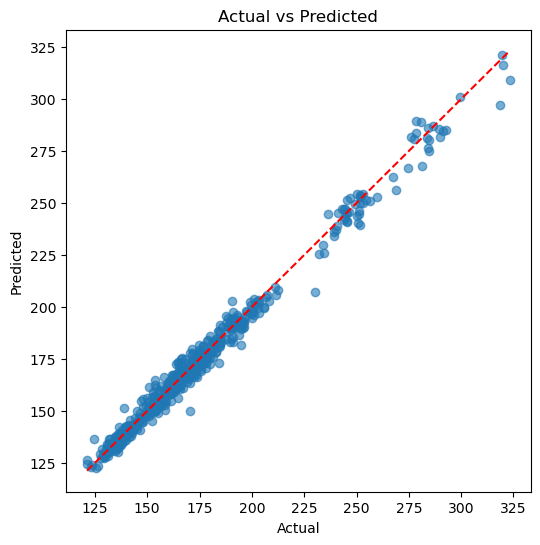

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [10]:
import joblib 
joblib.dump(lr, "GOOGL.pkl")
model = joblib.load("GOOGL.pkl")